<a href="https://colab.research.google.com/github/georgesteve/Research-Assitant-ML-ROJ/blob/main/Semana_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Revisión de papers**

---




#[Machine learning algorithm to forecast ionospheric time delays using Global Navigation satellite system observations](https://www.sciencedirect.com/science/article/abs/pii/S0094576520302630)

## Modelo GPR

[Quick Start to Gaussian Process Regression](https://towardsdatascience.com/quick-start-to-gaussian-process-regression-36d838810319)

Gaussian process regression (GPR) es una aproximación bayessiana no paramétrica y que está teniendo impacto en el área de machine learning.
GPR tiene diferentes beneficios, trabaja bien en datasets pequeños y puede calcular parámetros de incertidumbre en las predicciones.

Diferente a muchos populares algoritmos supervisados de machine learning que aprenden valores exactos para cada parámetro en una función, la aproximación bayessian infiere una distribución de probabilidad sobre todo los valores posibles.
Por ejemplo si asumimos una función lineal: `y=wx+ϵ`. La aproximación bayessiana trabaja especificando una distribución previa, p(w), para el parámetro, w ,y luego reordena las probabilidades en función a la evidencia (data observada) usando la regla de Bayes:

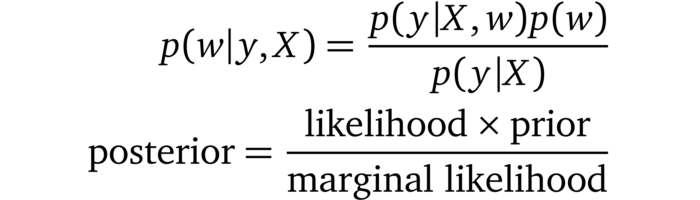

In [2]:
import sklearn.gaussian_process as gp

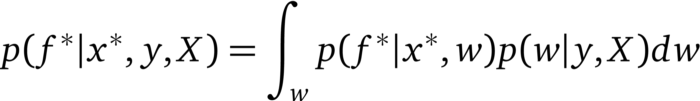

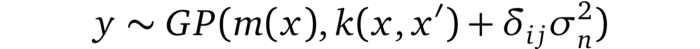

**Dataset**

In [ ]:
# X_tr <-- training observations [# points, # features]
# y_tr <-- training labels [# points]
# X_te <-- test observations [# points, # features]
# y_te <-- test labels [# points]

In [15]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
import pathlib

dataset_url = 'http://storage.googleapis.com/download.tensorflow.org/data/petfinder-mini.zip'
csv_file = 'datasets/petfinder-mini/petfinder-mini.csv'

tf.keras.utils.get_file('petfinder_mini.zip', dataset_url,
                        extract=True, cache_dir='.')
dataframe = pd.read_csv(csv_file)

1671168/1668792 [==============================] - 0s 0us/step


In [ ]:
# importing one hot encoder from sklearn 
# There are changes in OneHotEncoder class 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

# creating one hot encoder object with categorical feature 0 
# indicating the first column 
columnTransformer = ColumnTransformer([('encoder', 
										OneHotEncoder(), 
										[0])], 
									remainder='passthrough') 

data = np.array(columnTransformer.fit_transform(dataframe), dtype = np.str) 


In [ ]:
# In the original dataset "4" indicates the pet was not adopted.
dataframe['target'] = np.where(dataframe['AdoptionSpeed']==4, 0, 1)

# Drop un-used columns.
dataframe = dataframe.drop(columns=['AdoptionSpeed', 'Description'])

#dataframe.head(20)


In [ ]:
dataframe1=dataframe[:6000]
print(dataframe1.size)

84000


In [ ]:

from numpy import array
from numpy import argmax
from keras.utils import to_categorical


# one hot encode
dataframe['Type'] = to_categorical(dataframe['Type'])
print(dataframe['Type'])

In [ ]:
train, test = train_test_split(dataframe1, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


3840 train examples
960 validation examples
1200 test examples


In [ ]:
X_tr =train[['Fee','PhotoAmt']]
y_tr=train['target']
X_te =test[['Fee','PhotoAmt']]
y_te=test['target']



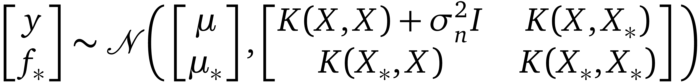

**Model Selection**

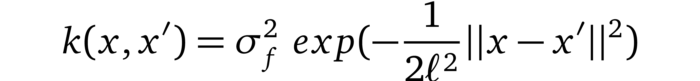

In [ ]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [ ]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [ ]:
model.fit(X_tr, y_tr)
params = model.kernel_.get_params()

**Inference**

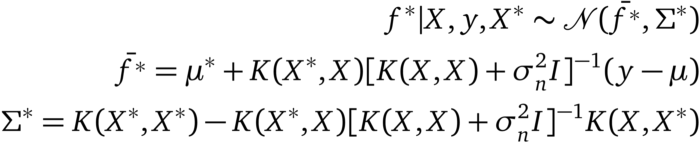

In [ ]:
y_pred, cov = model.predict(X_te,return_cov=True)

In [ ]:
MSE = ((y_pred-y_te)**2).mean()
print(MSE)

0.1898441420089439


TypeError: ignored

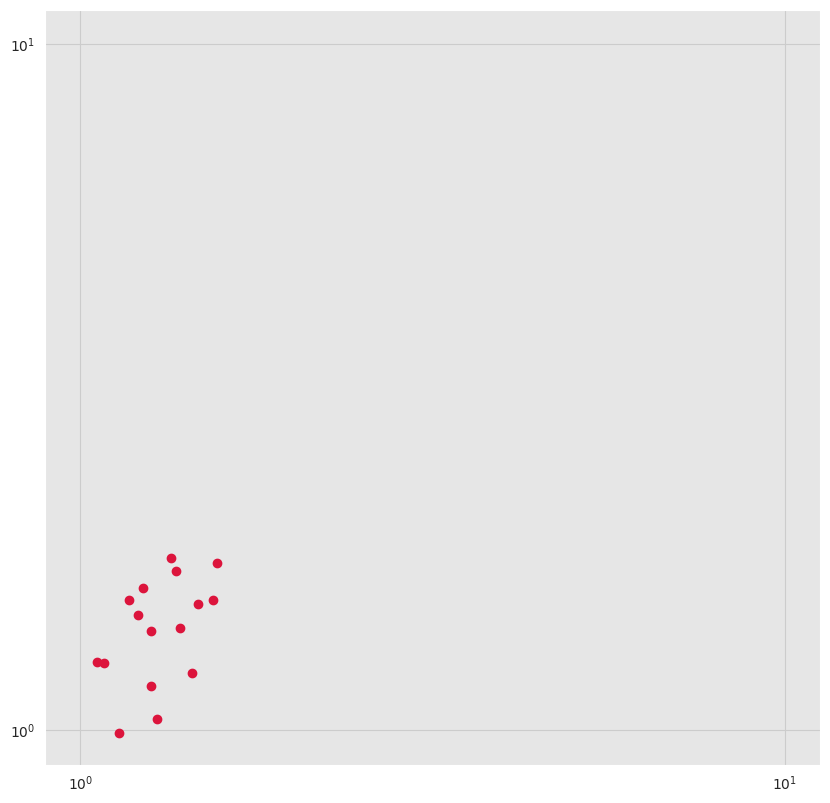

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred,y_te, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred) )#, max(true_value))
p2 = min(min(y_pred) )#, min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

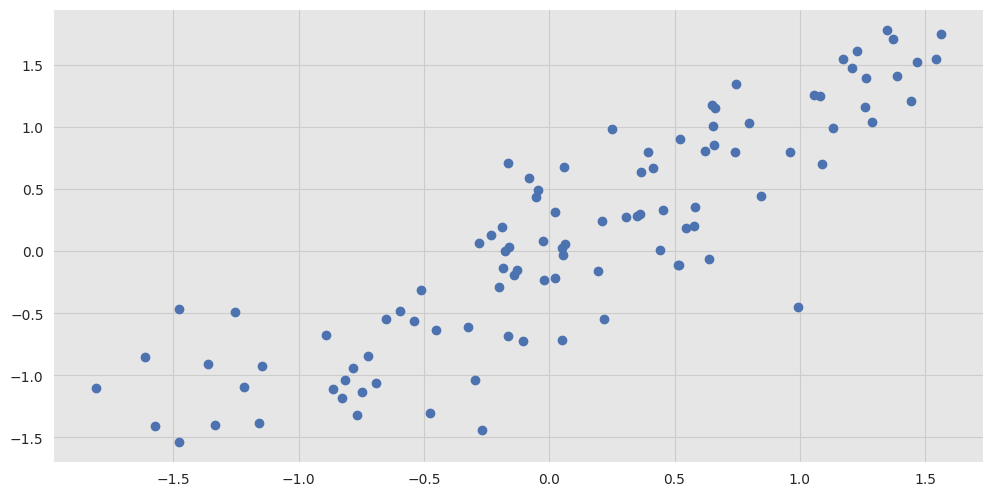

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(y_pred,y_te)

### Ejemplo con variable ruidosa

https://juanitorduz.github.io/gaussian_process_reg/

#####Preparación de gráficos

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

####Preparación de data de entrenamiento

A continuación generaremos una función para que luego pueda ser sampleada y porbar el algoritmo, también agregaremos un ruido a esta señal.

$\ f(x) = \sin(4\pi x) + \sin(7\pi x)$

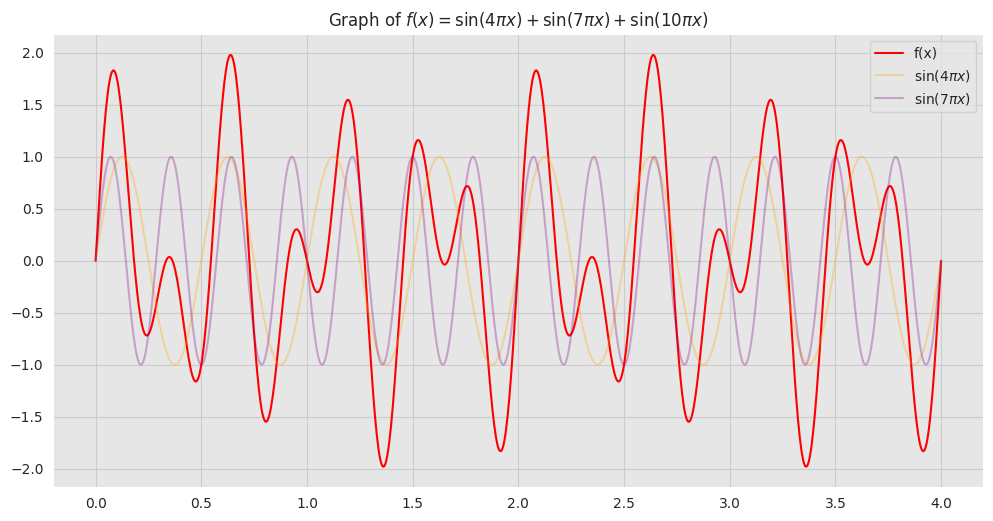

In [4]:
# Define dimension.
d = 2
# Number of samples (training set). 
n = 1000

x = np.linspace(start=0, stop=4, num=n)

def f(x):
    f = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)# + np.sin((10*np.pi)*x)
    return(f)

f_x = f(x)

fig, ax = plt.subplots()
# Plot function f. 
sns.lineplot(x=x, y=f_x, color='red', label = 'f(x)', ax=ax)
# Plot function components.
sns.lineplot(x=x, y=np.sin((4*np.pi)*x), color='orange', label='$\sin(4 \pi x)$', alpha=0.3, ax=ax)
sns.lineplot(x=x, y=np.sin((7*np.pi)*x), color='purple', label='$\sin(7 \pi x)$', alpha=0.3, ax=ax)
#sns.lineplot(x=x, y=np.sin((10*np.pi)*x), color='purple', label='$\sin(10 \pi x)$', alpha=0.3, ax=ax)
ax.legend(loc='upper right')
ax.set_title(r'Graph of $f(x) = \sin(4\pi x) + \sin(7\pi x)+ \sin(10\pi x)$');

Ahora agregaremos un ruido a nuestra señal

In [5]:

# Error standard deviation. 
sigma_n = 0.2
# Errors.
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)
# Observed target variable. 
y = f_x + epsilon


Ahora veremos la distribución del error

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


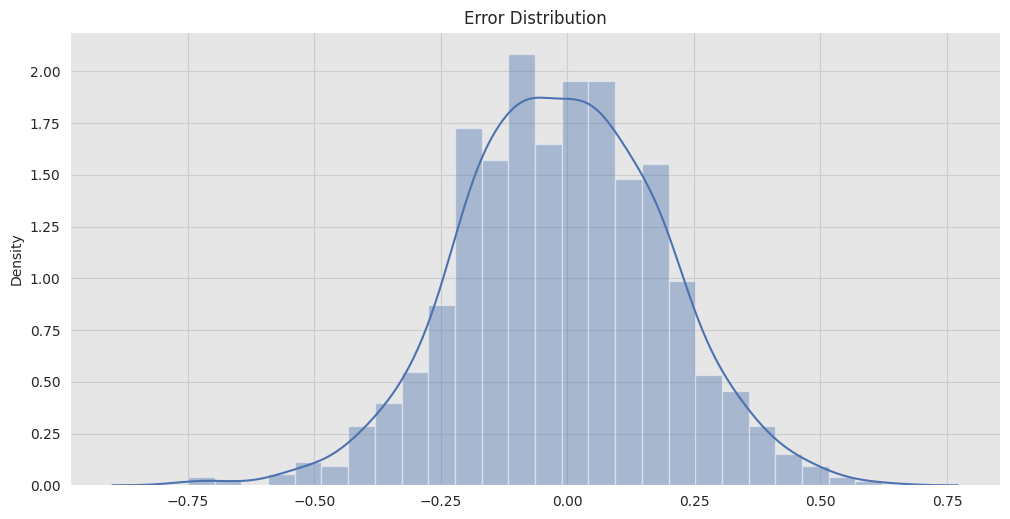

In [6]:
fig, ax = plt.subplots()
# Plot errors. 
sns.distplot(epsilon, ax=ax)
ax.set(title='Error Distribution');

Ahora observemos la señal ruidosa

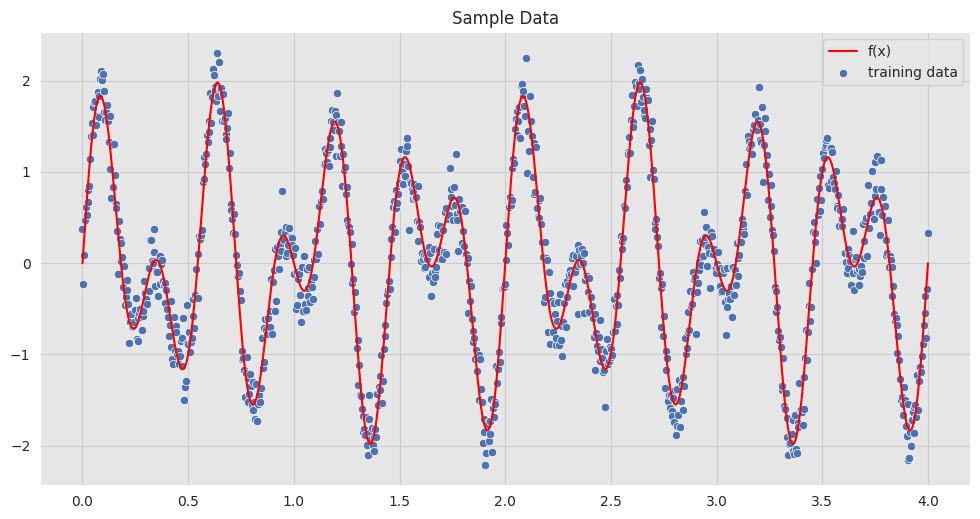

In [7]:

fig, ax = plt.subplots()
# Plot training data.
sns.scatterplot(x=x, y=y, label='training data', ax=ax);
# Plot "true" linear fit.
sns.lineplot(x=x, y=f_x, color='red', label='f(x)', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');

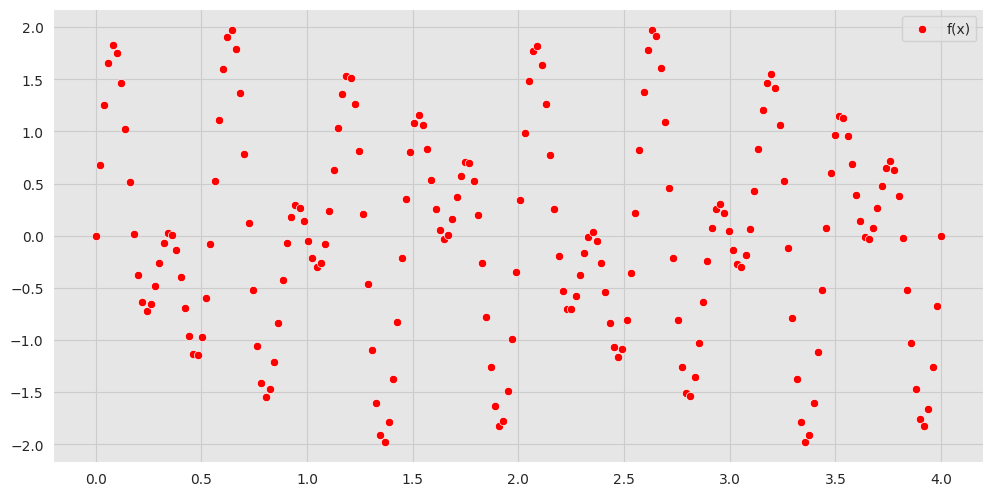

In [8]:
n_star = 200

x_star = np.linspace(start=0, stop=4, num=n_star)
fig, ax = plt.subplots()
sns.scatterplot(x=x_star, y=f(x_star), color='red', label='f(x)', ax=ax)

Construyo 2 señales artificiales con su propio erro sin(x/4) y sin(x/7)

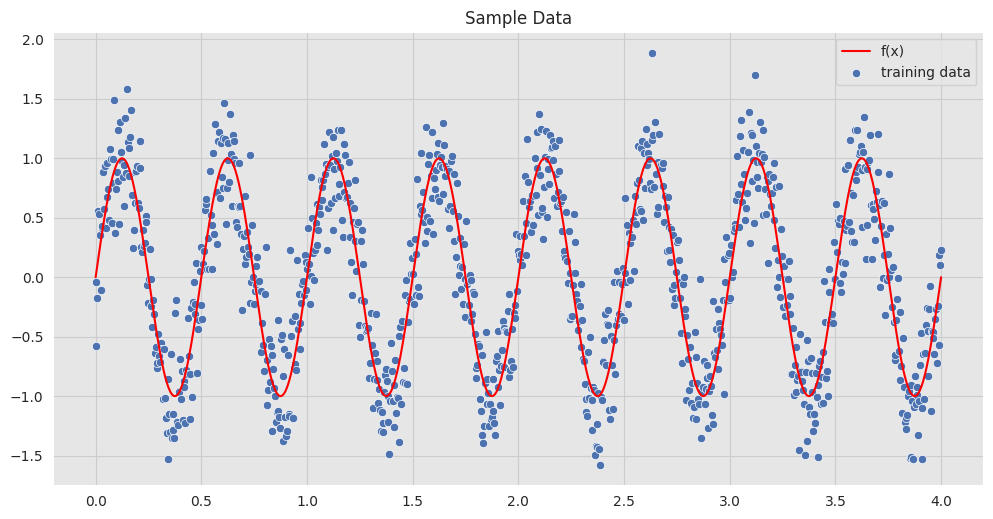

In [9]:

# Errors.
epsilon1 = np.random.normal(loc=0, scale=0.3, size=n)
epsilon2 = np.random.normal(loc=0, scale=0.4, size=n)
f4 = np.sin((4*np.pi)*x) + epsilon1
f7 = np.sin((7*np.pi)*x) + epsilon2



fig, ax = plt.subplots()
# Plot training data.
sns.scatterplot(x=x, y=f4, label='training data', ax=ax);
# Plot "true" linear fit.
sns.lineplot(x=x, y=np.sin((4*np.pi)*x), color='red', label='f(x)', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');

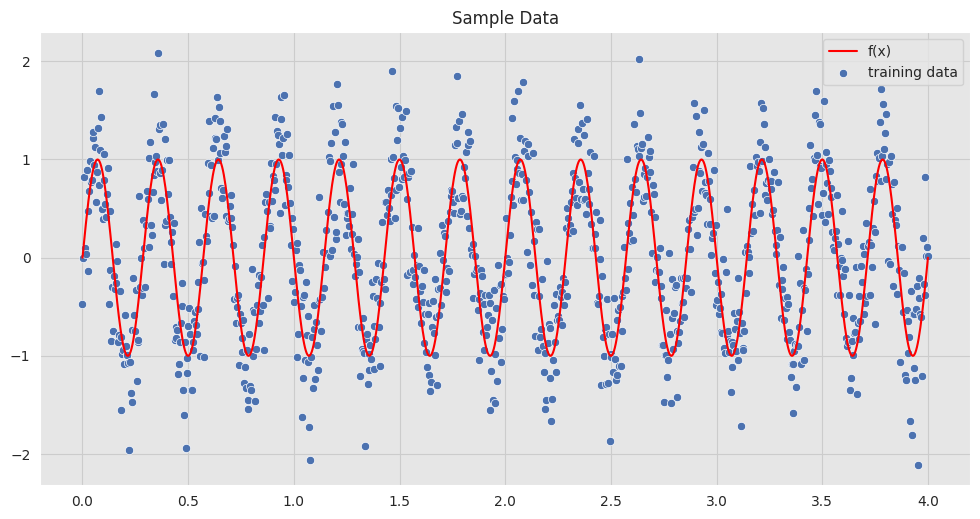

In [13]:
fig, ax = plt.subplots()
# Plot training data.
sns.scatterplot(x=x, y=f7, label='training data', ax=ax);
# Plot "true" linear fit.
sns.lineplot(x=x, y=np.sin((7*np.pi)*x), color='red', label='f(x)', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');

In [16]:
Ensayo=pd.DataFrame( {
        "x":x ,"f4":f4,"f7":f7,"f":y
      })
Ensayo=Ensayo.set_index('x')
Ensayo.head(10)

,f4,f7,f
x,,,
0.000000,-0.040119,-0.468629,0.374636
0.004004,-0.575528,-0.003221,-0.222868
0.008008,-0.178551,0.824597,0.094970
0.012012,0.553039,0.093741,0.473147
0.016016,0.528875,0.036899,0.620297
0.020020,0.356188,0.897710,0.524835
0.024024,-0.106709,-0.134532,0.800855
0.028028,0.412755,0.474358,0.673483
0.032032,0.431299,0.674126,0.845531


In [17]:
train, test = train_test_split(Ensayo, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


640 train examples
160 validation examples
200 test examples


In [18]:
X_tr =train[['f4','f7']]
y_tr=train['f']
X_te =test[['f4','f7']]
y_te=test['f']



#### Entrenamiento

In [19]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

In [20]:
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [21]:
model.fit(X_tr, y_tr)
params = model.kernel_.get_params()

#### Predicción con data inicial

In [22]:
y_pred, return_std = model.predict(X_te, return_cov=True)

print(return_std*1.96)

[[ 2.97573680e-03 -4.00466765e-05  1.63181670e-04 ...  1.19522256e-03
   8.72052971e-05  1.99413752e-03]
 [-4.00466765e-05  3.27805114e-03  1.53805606e-04 ... -6.00065679e-05
  -3.09354693e-04  1.03640024e-04]
 [ 1.63181670e-04  1.53805606e-04  4.43039308e-03 ... -6.77561650e-05
   1.93419590e-04  1.97848335e-04]
 ...
 [ 1.19522256e-03 -6.00065679e-05 -6.77561650e-05 ...  2.21887280e-03
  -1.04308330e-03  1.48051215e-03]
 [ 8.72052971e-05 -3.09354693e-04  1.93419590e-04 ... -1.04308330e-03
   2.17551740e-02 -6.13073063e-04]
 [ 1.99413752e-03  1.03640024e-04  1.97848335e-04 ...  1.48051215e-03
  -6.13073063e-04  3.80887015e-03]]


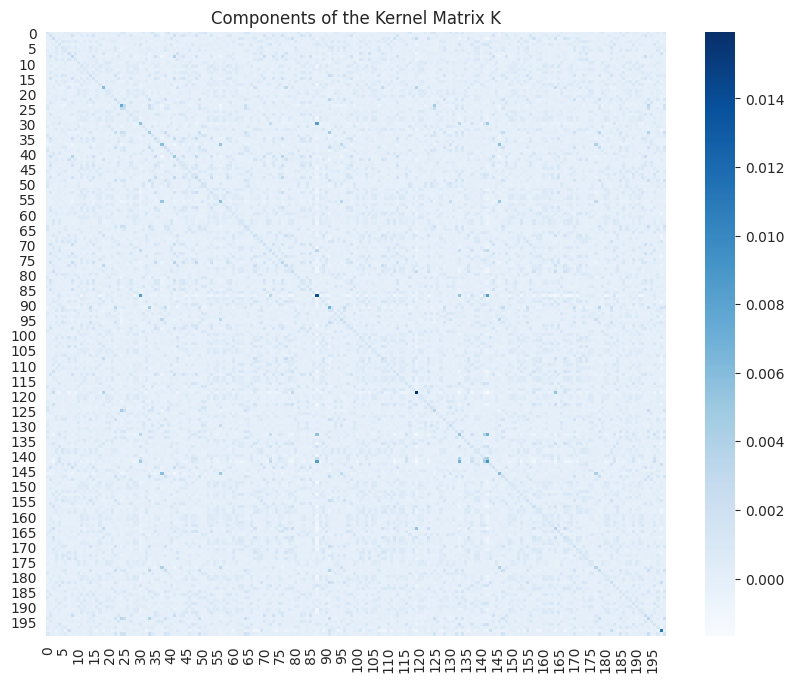

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data=return_std, cmap='Blues', ax=ax)
ax.set(title='Components of the Kernel Matrix K');
print()

In [24]:
MSE = ((y_pred-y_te)**2).mean()
print(MSE)

0.20704126841483547


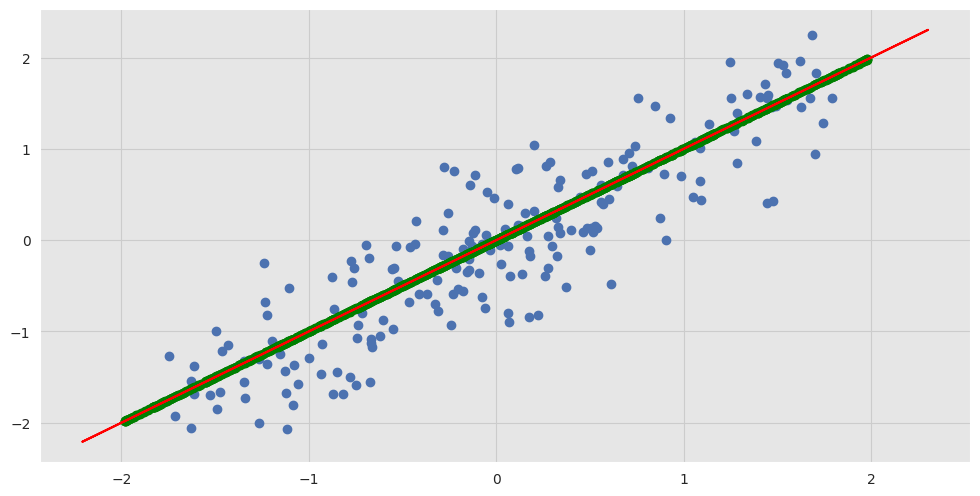

In [25]:
from matplotlib import pyplot as plt
plt.scatter(y_pred,y_te)
plt.scatter(f_x,f_x, color='green')
plt.plot(y, y, color='red', label='True')


200
200


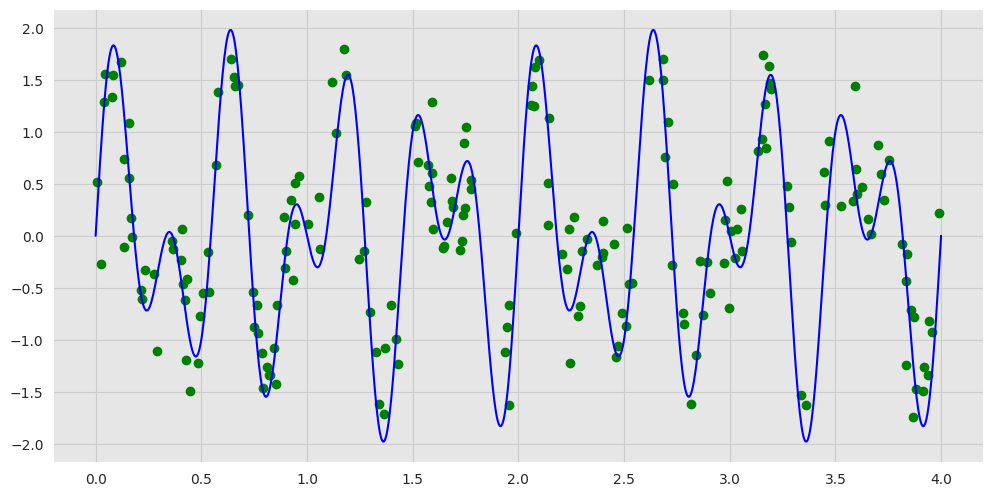

In [26]:
from matplotlib import pyplot as plt

plt.scatter(X_te.index,y_pred, color='green')
plt.plot(x,f_x, color='blue')
print(y_pred.size)
print(X_te.index.size)


####Predicción con data subsampleada

In [27]:
f4_x_star=np.sin((4*np.pi)*x_star) + np.random.normal(loc=0, scale=0.2, size=x_star.shape)
f7_x_star=np.sin((7*np.pi)*x_star) + np.random.normal(loc=0, scale=0.3, size=x_star.shape)
data_x_star=pd.DataFrame( {
        "x":x_star ,"f4": f4_x_star,"f7":f7_x_star})
data_x_star=data_x_star.set_index('x')
y_pred_x_star, return_std_x_star = model.predict(data_x_star, return_std=True)

#print(return_std_x_star*1.96)

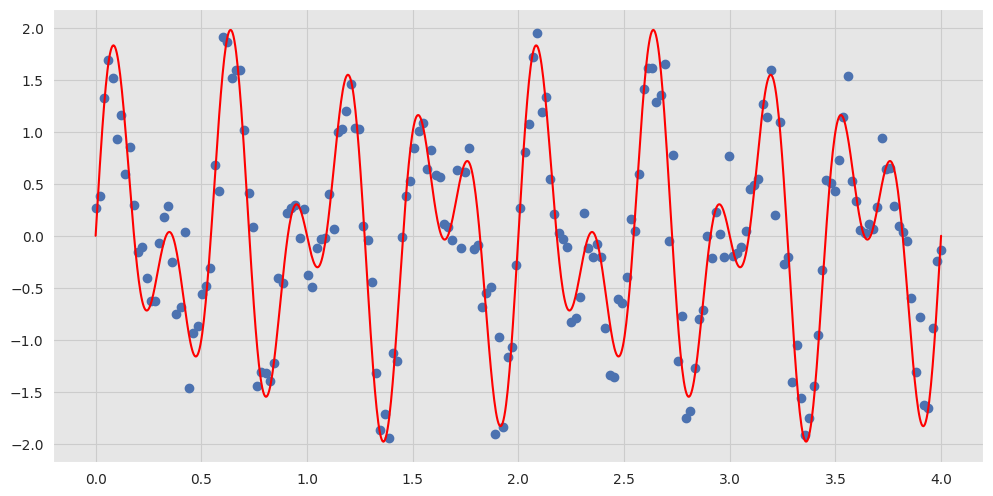

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x_star,y_pred_x_star)
plt.plot( x,f(x), color='red', label='True')

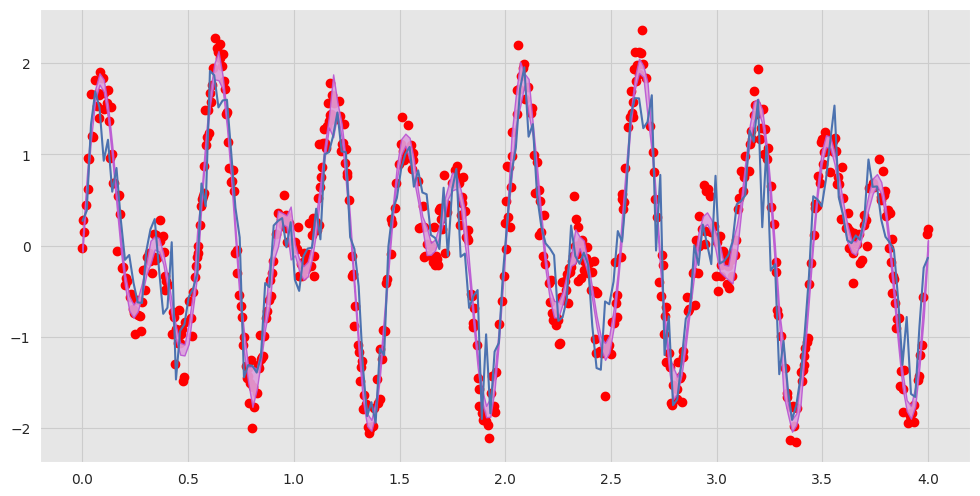

In [ ]:
plt.figure()
plt.plot(x_star,y_pred_x_star)
plt.scatter(y_tr.index,y_tr,color='red')
plt.fill_between( x_star,f(x_star)+return_std*1.96,f(x_star)-return_std*1.96, alpha=0.9, edgecolor='mediumorchid', facecolor='plum')

https://www.statology.org/plot-confidence-interval-python/



> Bloque con sangría

> Bloque con sangría





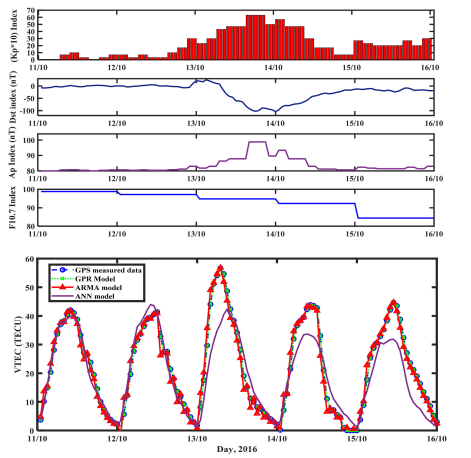

## Modelo ARMA

[Advanced Time Series Analysis with ARMA and ARIMA](https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d)

#[The Challenge of Machine Learning in Space Weather: Nowcasting and Forecasting](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2018SW002061)

Data recomendada en el paper

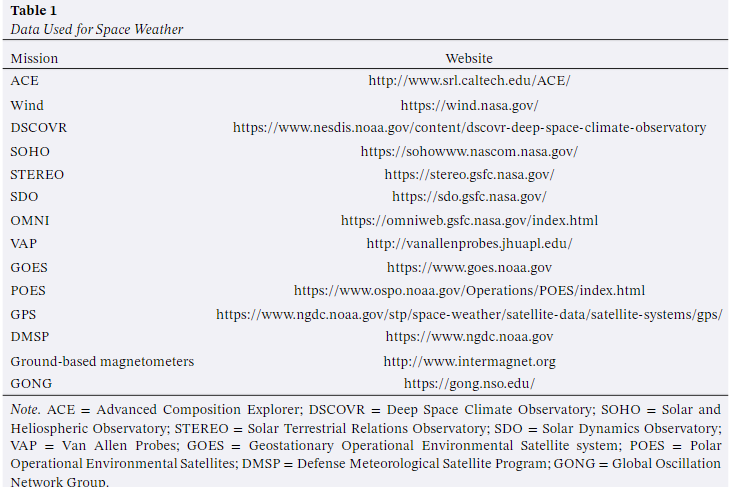

MEtricas que recomienda usar el paper

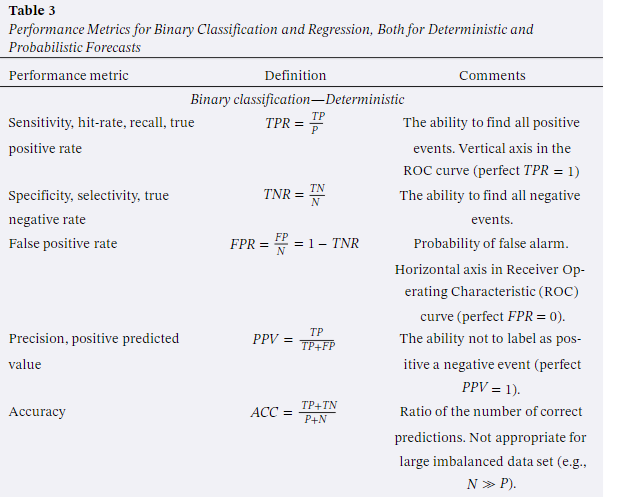

Los siguientes trabajos son descritos para Kp

Kp either one or multiple hours in advancehas been proposed in Bala et al. (2009), Boberg et al. (2000), Costello(1998), Gholipour et al. (2004), Tan et al. (2018), Uwamahoro andHabarulema (2014), Valach and Prigancová (2006), Wing et al. (2005),and Wintoft et al. (2017), among others

También se tuvieron trabajos de NOAA en modelos físicos que fueron comparados con modelos mixtos:  Boberg et al., 2000 and the NARMAX model, Ayala Solares et al., 2016; Boynton et al., 2018)

#[Predictive Space Weather: An information theory approach](https://www.sciencedirect.com/science/article/abs/pii/S027311771000709X)